In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
ind_covid_df = pd.read_csv('https://api.covid19india.org/csv/latest/case_time_series.csv')

In [3]:
ind_covid_df

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January 2020,2020-01-30,1,1,0,0,0,0
1,31 January 2020,2020-01-31,0,1,0,0,0,0
2,1 February 2020,2020-02-01,0,1,0,0,0,0
3,2 February 2020,2020-02-02,1,2,0,0,0,0
4,3 February 2020,2020-02-03,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...
463,7 May 2021,2021-05-07,406901,21892066,327675,17925061,4233,237716
464,8 May 2021,2021-05-08,403808,22295874,386395,18311456,4092,241808
465,9 May 2021,2021-05-09,366455,22662329,353777,18665233,3749,245557
466,10 May 2021,2021-05-10,329491,22991820,355930,19021163,3879,249436


In [4]:
ind_covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             468 non-null    object
 1   Date_YMD         468 non-null    object
 2   Daily Confirmed  468 non-null    int64 
 3   Total Confirmed  468 non-null    int64 
 4   Daily Recovered  468 non-null    int64 
 5   Total Recovered  468 non-null    int64 
 6   Daily Deceased   468 non-null    int64 
 7   Total Deceased   468 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 29.4+ KB


In [5]:
ind_covid_df.isnull().sum()

Date               0
Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [6]:
ind_covid_df['Date_YMD'] = pd.to_datetime(ind_covid_df['Date_YMD'])

In [7]:
ind_covid_df.tail(1)

,Date,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
467,11 May 2021,2021-05-11,348555,23340375,355398,19376561,4198,253634


In [8]:
total_cases = ind_covid_df['Total Confirmed']
dates = ind_covid_df['Date_YMD']

In [9]:
curr_date = dates.max()
curr_total_cases = int(total_cases.tail(1))

In [10]:
dates.max()

Timestamp('2021-05-11 00:00:00')

In [11]:
filt = ind_covid_df.Date_YMD==dates.max()
today_cases = int(ind_covid_df.loc[filt, 'Daily Confirmed'])

today_deaths = int(ind_covid_df.loc[filt, 'Daily Deceased'])

today_recovered = int(ind_covid_df.loc[filt, 'Daily Recovered'])

curr_total_deaths = int(ind_covid_df.loc[filt, 'Total Deceased'])

curr_total_recovered = int(ind_covid_df.loc[filt, 'Total Recovered'])

Text(-80, 1, '23340375')

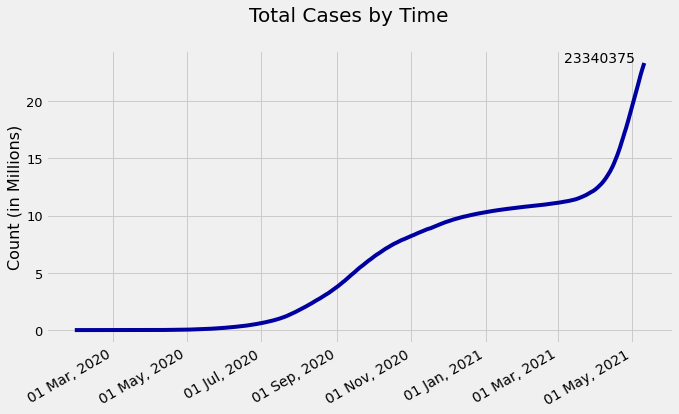

In [12]:
plt.style.use('fivethirtyeight')
# total_cases.plot(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.plot(dates, total_cases.values/10**6, color='#0000a0')
# plt.plot(total_deaths.index, total_deaths.values, linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xlabel('')
plt.ylabel('Count (in Millions)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.suptitle('Total Cases by Time', fontsize=20)

plt.annotate(text=str(curr_total_cases), xy=(curr_date,curr_total_cases/10**6),
             xycoords='data', xytext=(-80,1), textcoords='offset points', fontsize=14)

In [13]:
daily_cases = ind_covid_df['Daily Confirmed']

Text(-56, 1, '348555')

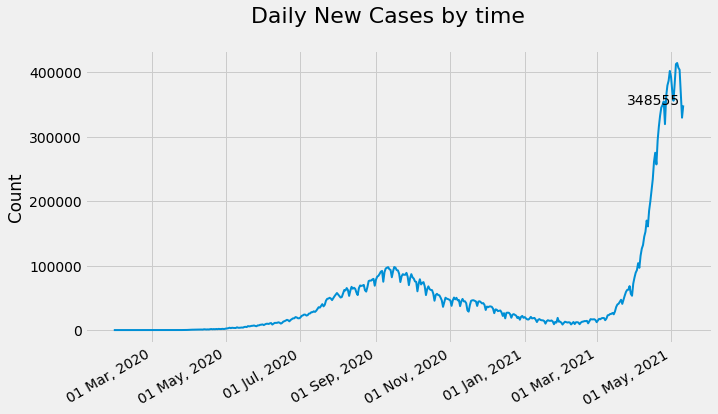

In [14]:
plt.figure(figsize=(10,6))
plt.plot(dates, daily_cases,'-', linewidth=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily New Cases by time',fontsize=22)

plt.annotate(text=str(today_cases), xy=(curr_date, today_cases),
             xycoords='data', xytext=(-56,1), textcoords='offset points', fontsize=14)

In [15]:
total_deaths = ind_covid_df['Total Deceased']

Text(-56, 1, '253634')

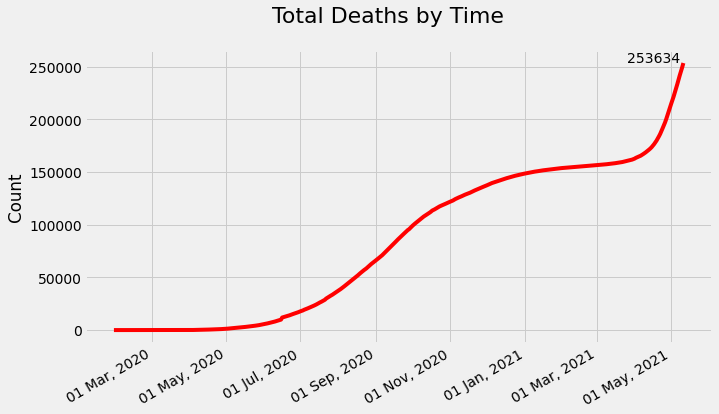

In [16]:
plt.figure(figsize=(10,6))
plt.plot(dates, total_deaths, color='red')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Total Deaths by Time', fontsize=22)

plt.annotate(text=str(curr_total_deaths), xy=(curr_date, curr_total_deaths),
             xycoords='data', xytext=(-56,1), textcoords='offset points', fontsize=14)

In [17]:
daily_deaths = ind_covid_df['Daily Deceased']

Text(-40, 1, '4198')

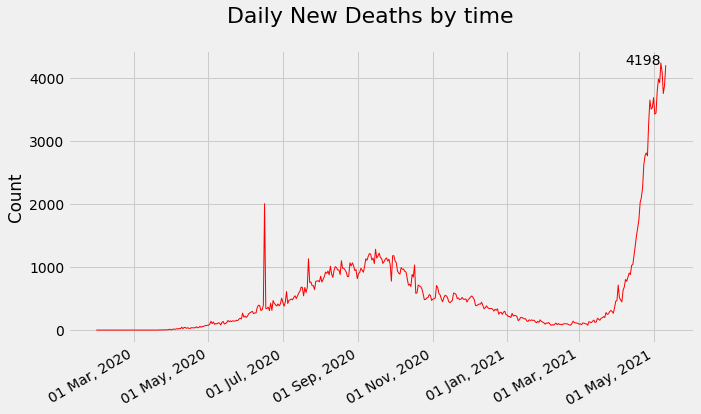

In [18]:
plt.figure(figsize=(10,6))
plt.plot(dates, daily_deaths,'-r', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily New Deaths by time',fontsize=22)

plt.annotate(text=str(today_deaths), xy=(curr_date, today_deaths),
             xycoords='data', xytext=(-40,1), textcoords='offset points', fontsize=14)

In [19]:
total_recovered = ind_covid_df['Total Recovered']

Text(-70, 1, '19376561')

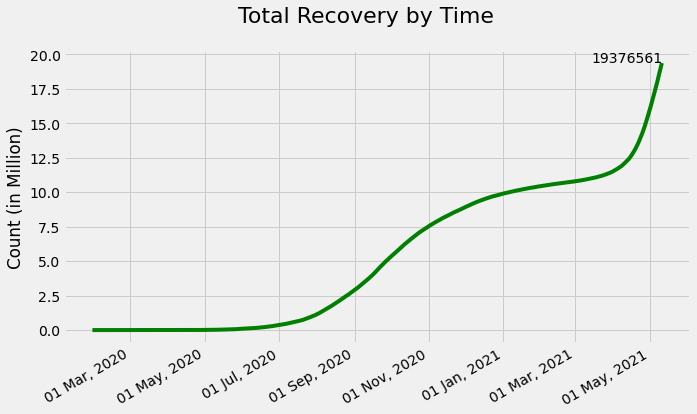

In [20]:
plt.figure(figsize=(10,6))
plt.plot(dates, total_recovered/10**6, color='green')

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count (in Million)')
plt.suptitle('Total Recovery by Time', fontsize=22)

plt.annotate(text=str(curr_total_recovered), xy=(curr_date, curr_total_recovered/10**6),
             xycoords='data', xytext=(-70,1), textcoords='offset points', fontsize=14)

In [21]:
daily_recovered = ind_covid_df['Daily Recovered']

Text(-60, 1, '355398')

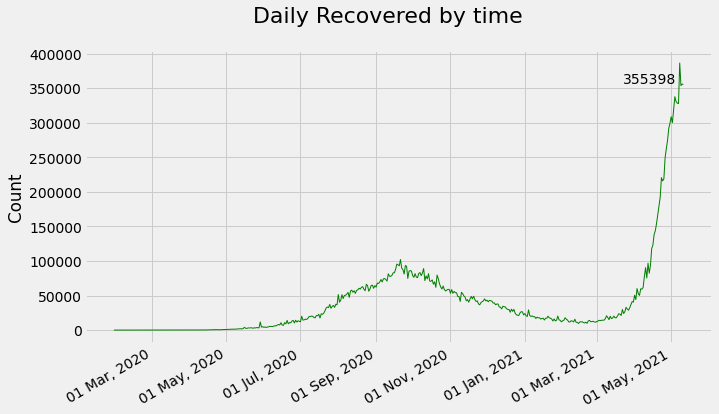

In [22]:
plt.figure(figsize=(10,6))
plt.plot(dates, daily_recovered,'-g', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count')
plt.suptitle('Daily Recovered by time',fontsize=22)

plt.annotate(text=str(today_recovered), xy=(curr_date, today_recovered),
             xycoords='data', xytext=(-60,1), textcoords='offset points', fontsize=14)

In [23]:
active_cases = total_cases-total_deaths-total_recovered

In [24]:
curr_active_cases = curr_total_cases - curr_total_deaths - curr_total_recovered

Text(-66, 1, '3710180')

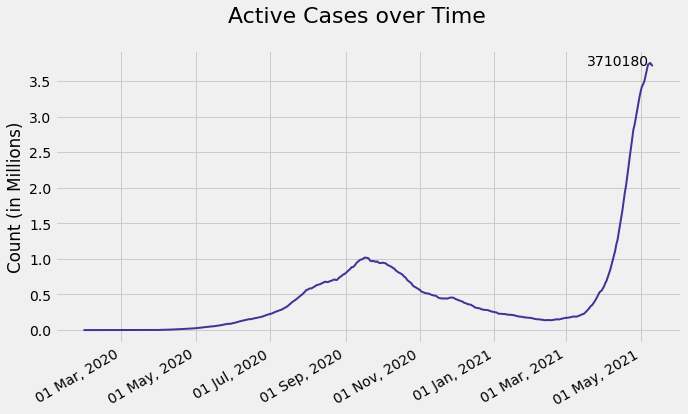

In [25]:
plt.figure(figsize=(10,6))
plt.plot(dates, active_cases/10**6, color='#483096', linewidth=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Count (in Millions)')
plt.suptitle('Active Cases over Time',fontsize=22)

plt.annotate(text=str(curr_active_cases), xy=(curr_date, curr_active_cases/10**6),
             xycoords='data', xytext=(-66,1), textcoords='offset points', fontsize=14)

## Summary

In [26]:
inf_fatality_ratio = (total_deaths/total_cases)*100

In [27]:
curr_fat_ratio = (curr_total_deaths/curr_total_cases)*100

Text(-48, -10, '1.087')

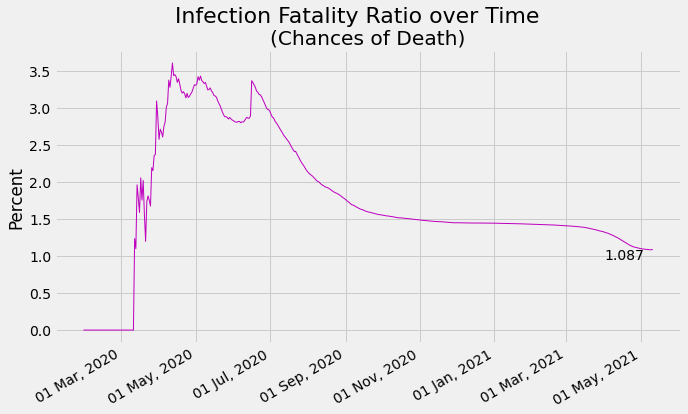

In [28]:
plt.figure(figsize=(10,6))
plt.plot(dates, inf_fatality_ratio,'-m', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Percent')
plt.suptitle('Infection Fatality Ratio over Time',fontsize=22)
plt.title('(Chances of Death)')

plt.annotate(text=str(round(curr_fat_ratio, 3)), xy=(curr_date, curr_fat_ratio),
             xycoords='data', xytext=(-48,-10), textcoords='offset points', fontsize=14)

In [29]:
recovery_rate = (total_recovered/total_cases)*100

In [30]:
curr_rec_ratio = (curr_total_recovered/curr_total_cases)*100

Text(-50, -5, '83.02')

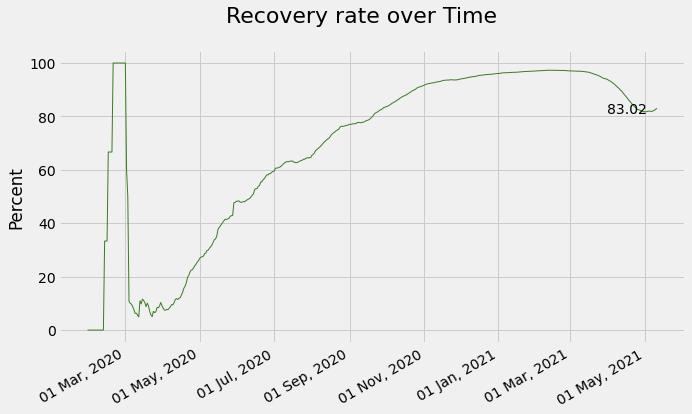

In [31]:
plt.figure(figsize=(10,6))
plt.plot(dates, recovery_rate, color='#3b7d24', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Percent')
plt.suptitle('Recovery rate over Time',fontsize=22)

plt.annotate(text=str(round(curr_rec_ratio, 2)), xy=(curr_date, curr_rec_ratio),
             xycoords='data', xytext=(-50,-5), textcoords='offset points', fontsize=14)

In [32]:
per_act_cases = (active_cases/total_cases)*100

In [33]:
curr_per_act_cases = (curr_active_cases/curr_total_cases)*100

Text(-40, 1, '15.9')

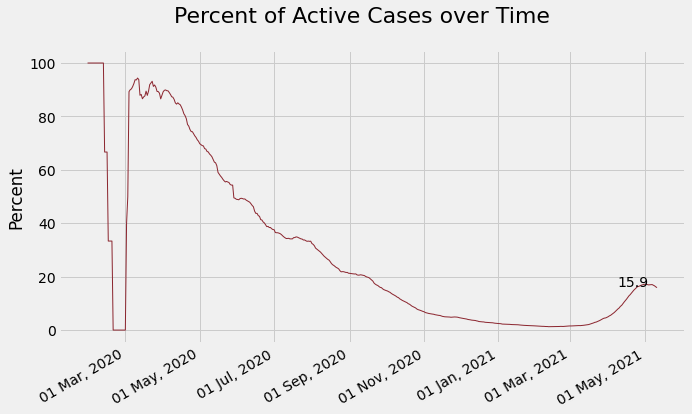

In [34]:
plt.figure(figsize=(10,6))
plt.plot(dates, per_act_cases, color='#8c2730', linewidth=1)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.ylabel('Percent')
plt.suptitle('Percent of Active Cases over Time',fontsize=22)

plt.annotate(text=str(round(curr_per_act_cases, 2)), xy=(curr_date, curr_per_act_cases),
             xycoords='data', xytext=(-40,1), textcoords='offset points', fontsize=14)

Text(-60, -10, '3710180')

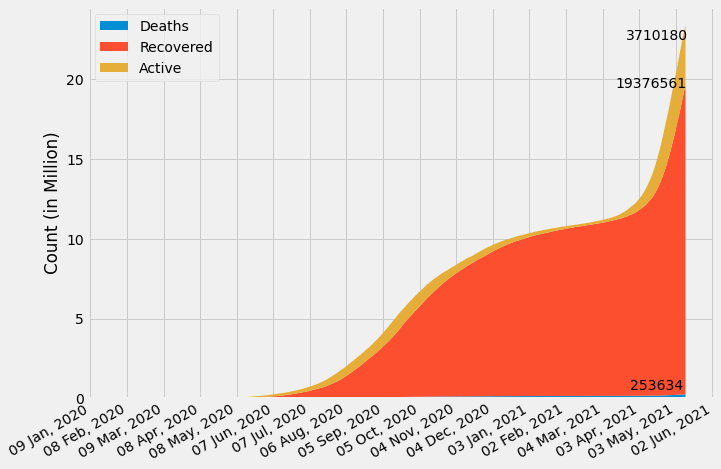

In [35]:
fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

labels = ['Deaths','Recovered','Active']
ax.stackplot(dates, total_deaths/10**6,total_recovered/10**6,active_cases/10**6, labels=labels)
ax.set_ylabel('Count (in Million)')
ax.legend(loc='upper left')

fig.autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')

ax.xaxis.set_major_locator(plt.MaxNLocator(18))
ax.xaxis.set_major_formatter(date_format)

plt.annotate(text=str(curr_total_deaths), xy=(curr_date, curr_total_deaths/10**6),
             xycoords='data', xytext=(-55,5), textcoords='offset points', fontsize=14)

plt.annotate(text=str(curr_total_recovered), xy=(curr_date, curr_total_recovered/10**6),
             xycoords='data', xytext=(-70,1), textcoords='offset points', fontsize=14)

plt.annotate(text=str(curr_active_cases), xy=(curr_date, curr_active_cases/10**6 + curr_total_recovered/10**6),
             xycoords='data', xytext=(-60,-10), textcoords='offset points', fontsize=14)

In [36]:
total_deaths.max()

253634

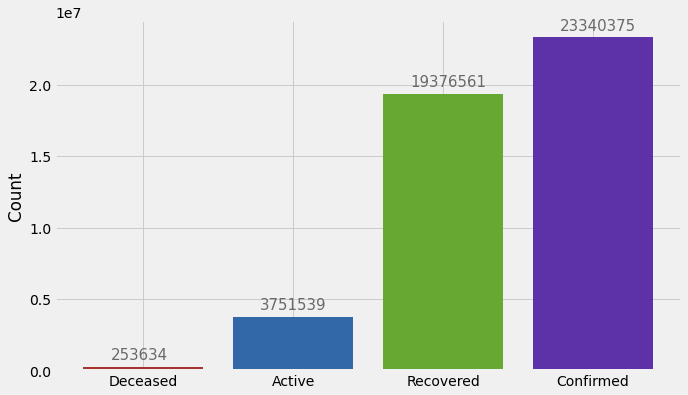

In [37]:
fig, ax = plt.subplots(figsize=(10,6))

labels = ['Deceased', 'Active', 'Recovered', 'Confirmed']
values = [total_deaths.max(), active_cases.max(), total_recovered.max(), total_cases.max()]

ax.bar(labels, values, color=['#a83232','#3267a8','#67a832','#5d32a8'])
ax.set_ylabel('Count')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.18, i.get_height()+500000, \
            str(round(i.get_height())), fontsize=15,
                color='dimgrey')

# Vaccination

In [38]:
vac_df = pd.read_csv('http://api.covid19india.org/csv/latest/cowin_vaccine_data_statewise.csv')
pd.set_option('display.max_rows', 1000)

In [39]:
filt = vac_df.State=='India'
ind_vac_df = vac_df.loc[filt].copy()

In [40]:
ind_vac_df.head(200)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,132784.0,233143.0,38.0,5367.0,360598.0,NaN,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,193899.0,355402.0,80.0,8128.0,541253.0,NaN,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,267856.0,491049.0,103.0,11192.0,747816.0,NaN,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,296283.0,538647.0,128.0,13156.0,821902.0,NaN,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,444137.0,832766.0,201.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,NaN,1277104.0


In [41]:
total_population = 1380004385

In [42]:
ind_vac_df.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered', 'AEFI',
       '18-30 years (Age)', '30-45 years (Age)', '45-60 years (Age)',
       '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

In [43]:
ind_vac_df.drop(['State','Total Sessions Conducted','Total Sites ','Male(Individuals Vaccinated)','Female(Individuals Vaccinated)','Transgender(Individuals Vaccinated)','AEFI'], axis=1, inplace=True)

In [44]:
ind_vac_df

,Updated On,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,48276.0,48276.0,0.0,579.0,47697.0,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,58604.0,58604.0,0.0,635.0,57969.0,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,99449.0,99449.0,0.0,1299.0,98150.0,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,195525.0,195525.0,0.0,3017.0,192508.0,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,251280.0,251280.0,0.0,3946.0,247334.0,NaN,NaN,NaN,NaN,251280.0
5,21/01/2021,365965.0,365965.0,0.0,5367.0,360598.0,NaN,NaN,NaN,NaN,365965.0
6,22/01/2021,549381.0,549381.0,0.0,8128.0,541253.0,NaN,NaN,NaN,NaN,549381.0
7,23/01/2021,759008.0,759008.0,0.0,11192.0,747816.0,NaN,NaN,NaN,NaN,759008.0
8,24/01/2021,835058.0,835058.0,0.0,13156.0,821902.0,NaN,NaN,NaN,NaN,835058.0
9,25/01/2021,1277104.0,1277104.0,0.0,18858.0,1258246.0,NaN,NaN,NaN,NaN,1277104.0


In [45]:
ind_vac_df['Total Doses Administered']=ind_vac_df['First Dose Administered']+ind_vac_df['Second Dose Administered']

In [46]:
ind_vac_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Updated On                     119 non-null    object 
 1   Total Individuals Vaccinated   116 non-null    float64
 2   First Dose Administered        116 non-null    float64
 3   Second Dose Administered       116 non-null    float64
 4   Total Covaxin Administered     116 non-null    float64
 5   Total CoviShield Administered  116 non-null    float64
 6   18-30 years (Age)              57 non-null     float64
 7   30-45 years (Age)              57 non-null     float64
 8   45-60 years (Age)              57 non-null     float64
 9   60+ years (Age)                57 non-null     float64
 10  Total Doses Administered       116 non-null    float64
dtypes: float64(10), object(1)
memory usage: 11.2+ KB


In [47]:
ind_vac_df.rename(columns={'Updated On':'Date'}, inplace=True)

In [48]:
ind_vac_df.dropna(thresh=5,inplace=True)

In [49]:
ind_vac_df.loc[:,['First Dose Administered','Second Dose Administered',
                  'Total Covaxin Administered','Total CoviShield Administered',
                  'Total Individuals Vaccinated',
                  'Total Doses Administered']]=ind_vac_df.loc[:,['First Dose Administered',
                                                                 'Second Dose Administered',
                                                                 'Total Covaxin Administered','Total CoviShield Administered','Total Individuals Vaccinated','Total Doses Administered']].astype('int64')

In [50]:
ind_vac_df['Date'] = pd.to_datetime(ind_vac_df['Date'],format='%d/%m/%Y')

In [51]:
ind_vac_df

,Date,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276
1,2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604
2,2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449
3,2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525
4,2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280
5,2021-01-21,365965,365965,0,5367,360598,NaN,NaN,NaN,NaN,365965
6,2021-01-22,549381,549381,0,8128,541253,NaN,NaN,NaN,NaN,549381
7,2021-01-23,759008,759008,0,11192,747816,NaN,NaN,NaN,NaN,759008
8,2021-01-24,835058,835058,0,13156,821902,NaN,NaN,NaN,NaN,835058
9,2021-01-25,1277104,1277104,0,18858,1258246,NaN,NaN,NaN,NaN,1277104


In [52]:
ind_vac_df.set_index('Date',inplace=True)

In [53]:
ind_vac_df['Percentage Population Vaccinated'] = (ind_vac_df['Total Individuals Vaccinated']/total_population)*100

In [54]:
ind_vac_df['Percentage Population Completely Vaccinated'] = (ind_vac_df['Second Dose Administered']/total_population)*100

In [55]:
ind_vac_df

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,Percentage Population Vaccinated,Percentage Population Completely Vaccinated
Date,,,,,,,,,,,,
2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276,0.003498,0.000000
2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604,0.004247,0.000000
2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449,0.007206,0.000000
2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525,0.014168,0.000000
2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280,0.018209,0.000000
2021-01-21,365965,365965,0,5367,360598,NaN,NaN,NaN,NaN,365965,0.026519,0.000000
2021-01-22,549381,549381,0,8128,541253,NaN,NaN,NaN,NaN,549381,0.039810,0.000000
2021-01-23,759008,759008,0,11192,747816,NaN,NaN,NaN,NaN,759008,0.055000,0.000000
2021-01-24,835058,835058,0,13156,821902,NaN,NaN,NaN,NaN,835058,0.060511,0.000000


In [56]:
curr_date = ind_vac_df.index.max()
curr_fst_dose = ind_vac_df.loc[curr_date, 'First Dose Administered']
curr_snd_dose = ind_vac_df.loc[curr_date, 'Second Dose Administered']

In [57]:
per_pop_vac = ind_vac_df['Percentage Population Vaccinated'].max()
per_pop_com_vac = ind_vac_df['Percentage Population Completely Vaccinated'].max()

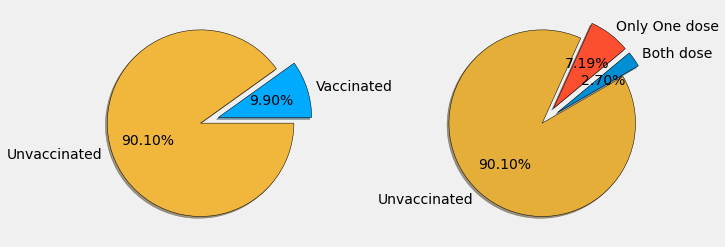

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(10)

slices = [per_pop_vac, 100-per_pop_vac]
colors = ['#00aaff', '#f0b73c']
labels = ['Vaccinated','Unvaccinated']
ax1.pie(slices, labels=labels,colors=colors, wedgeprops={'edgecolor':'black'}, shadow=True, explode=(0.2,0),  autopct='%.2f%%')

slices = [per_pop_com_vac, per_pop_vac-per_pop_com_vac, 100-per_pop_vac]
labels = ['Both dose','Only One dose','Unvaccinated']
ax2.pie(slices, labels=labels,startangle=30,
        wedgeprops={'edgecolor':'black'}, shadow=True, explode=(0.2,0.2,0),  autopct='%.2f%%')

plt.show()

Text(-35, 0, '9.9')

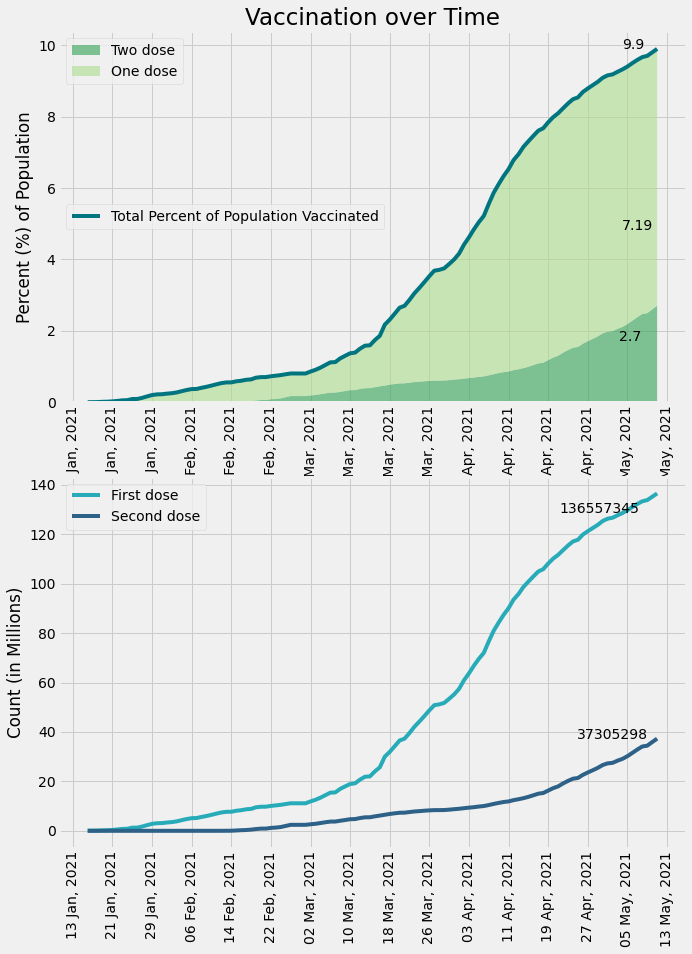

In [59]:
fig, (ax,ax2) = plt.subplots(2,1)
fig.set_figheight(14)
fig.set_figwidth(10)

ax1 = ax.twiny()
ax.stackplot(ind_vac_df.index, ind_vac_df['Percentage Population Completely Vaccinated'],
             ind_vac_df['Percentage Population Vaccinated']-ind_vac_df['Percentage Population Completely Vaccinated'],
             labels=['Two dose','One dose'],colors=['#31a354','#addd8e'], alpha=.6)
ax.set_ylabel('Percent (%) of Population')
ax.legend(loc='upper left')

ax.set_xticks(ind_vac_df.index)
ax.xaxis.set_major_locator(plt.MaxNLocator(18))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    

date_format = mpl_dates.DateFormatter('%d %b, %Y')
ax.xaxis.set_major_formatter(date_format)

ax1.plot(ind_vac_df.index, ind_vac_df['Percentage Population Vaccinated'],
         label='Total Percent of Population Vaccinated', color='#007580')
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.legend(loc='center left')

ax1.set_title('Vaccination over Time', fontsize=23)


ax2.plot(ind_vac_df.index, ind_vac_df['First Dose Administered']/10**6, color='#28abb9', label='First dose')
ax2.plot(ind_vac_df.index, ind_vac_df['Second Dose Administered']/10**6, color='#2d6187', label='Second dose')
ax2.legend()
ax2.set_ylabel('Count (in Millions)')
ax2.set_xticks(ind_vac_df.index)
ax2.xaxis.set_major_locator(plt.MaxNLocator(18))
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.xaxis.set_major_formatter(date_format)
ax2.annotate(text=str(curr_fst_dose), xy=(curr_date,curr_fst_dose/10**6), xycoords='data',
            xytext=(-98, -20),
            textcoords='offset points')
ax2.annotate(text=str(curr_snd_dose), xy=(curr_date,curr_snd_dose/10**6), xycoords='data',
            xytext=(-80, 0),
            textcoords='offset points')

plt.annotate(text=str(round(per_pop_com_vac,2)), xy=(curr_date, per_pop_com_vac),
             xycoords='data', xytext=(-38,-35), textcoords='offset points', fontsize=14)

plt.annotate(text=str(round(per_pop_vac-per_pop_com_vac, 2)), xy=(curr_date, per_pop_vac-per_pop_com_vac),
             xycoords='data', xytext=(-35,-85), textcoords='offset points', fontsize=14)

plt.annotate(text=str(round(per_pop_vac, 2)), xy=(curr_date, per_pop_vac),
             xycoords='data', xytext=(-35,0), textcoords='offset points', fontsize=14)

In [60]:
help(ax.annotate)

Help on method annotate in module matplotlib.axes._axes:

annotate(text, xy, *args, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Annotate the point *xy* with text *text*.
    
    In the simplest form, the text is placed at *xy*.
    
    Optionally, the text can be displayed in another position *xytext*.
    An arrow pointing from the text to the annotated point *xy* can then
    be added by defining *arrowprops*.
    
    Parameters
    ----------
    text : str
        The text of the annotation.
    
    xy : (float, float)
        The point *(x, y)* to annotate. The coordinate system is determined
        by *xycoords*.
    
    xytext : (float, float), default: *xy*
        The position *(x, y)* to place the text at. The coordinate system
        is determined by *textcoords*.
    
    xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'
    
        The coordinate system that *xy* is given in. The following types
  

In [61]:
ind_vac_df

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,Percentage Population Vaccinated,Percentage Population Completely Vaccinated
Date,,,,,,,,,,,,
2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276,0.003498,0.000000
2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604,0.004247,0.000000
2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449,0.007206,0.000000
2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525,0.014168,0.000000
2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280,0.018209,0.000000
2021-01-21,365965,365965,0,5367,360598,NaN,NaN,NaN,NaN,365965,0.026519,0.000000
2021-01-22,549381,549381,0,8128,541253,NaN,NaN,NaN,NaN,549381,0.039810,0.000000
2021-01-23,759008,759008,0,11192,747816,NaN,NaN,NaN,NaN,759008,0.055000,0.000000
2021-01-24,835058,835058,0,13156,821902,NaN,NaN,NaN,NaN,835058,0.060511,0.000000


In [62]:
daily_vac = []

prev_vac=0;
curr_vac=0;

for i in range(ind_vac_df.shape[0]):
    curr_vac=ind_vac_df['Total Individuals Vaccinated'][i]
    daily_vac.append(curr_vac - prev_vac)
    prev_vac=curr_vac
    
ind_vac_df['Daily Individuals Vaccinated'] = daily_vac

In [63]:
ind_vac_df

,Total Individuals Vaccinated,First Dose Administered,Second Dose Administered,Total Covaxin Administered,Total CoviShield Administered,18-30 years (Age),30-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered,Percentage Population Vaccinated,Percentage Population Completely Vaccinated,Daily Individuals Vaccinated
Date,,,,,,,,,,,,,
2021-01-16,48276,48276,0,579,47697,NaN,NaN,NaN,NaN,48276,0.003498,0.000000,48276
2021-01-17,58604,58604,0,635,57969,NaN,NaN,NaN,NaN,58604,0.004247,0.000000,10328
2021-01-18,99449,99449,0,1299,98150,NaN,NaN,NaN,NaN,99449,0.007206,0.000000,40845
2021-01-19,195525,195525,0,3017,192508,NaN,NaN,NaN,NaN,195525,0.014168,0.000000,96076
2021-01-20,251280,251280,0,3946,247334,NaN,NaN,NaN,NaN,251280,0.018209,0.000000,55755
2021-01-21,365965,365965,0,5367,360598,NaN,NaN,NaN,NaN,365965,0.026519,0.000000,114685
2021-01-22,549381,549381,0,8128,541253,NaN,NaN,NaN,NaN,549381,0.039810,0.000000,183416
2021-01-23,759008,759008,0,11192,747816,NaN,NaN,NaN,NaN,759008,0.055000,0.000000,209627
2021-01-24,835058,835058,0,13156,821902,NaN,NaN,NaN,NaN,835058,0.060511,0.000000,76050


In [64]:
daily_vac = ind_vac_df['Daily Individuals Vaccinated']

In [65]:
daily_vac

Date
2021-01-16      48276
2021-01-17      10328
2021-01-18      40845
2021-01-19      96076
2021-01-20      55755
2021-01-21     114685
2021-01-22     183416
2021-01-23     209627
2021-01-24      76050
2021-01-25     442046
2021-01-26      16680
2021-01-27     432706
2021-01-28     569001
2021-01-29     519312
2021-01-30     252933
2021-01-31      59371
2021-02-01     223158
2021-02-02     177706
2021-02-03     297864
2021-02-04     488469
2021-02-05     451620
2021-02-06     345903
2021-02-07      56272
2021-02-08     447400
2021-02-09     386975
2021-02-10     459796
2021-02-11     496283
2021-02-12     465264
2021-02-13     263535
2021-02-14      23015
2021-02-15     400795
2021-02-16     226438
2021-02-17     367098
2021-02-18     157793
2021-02-19     661076
2021-02-20     210938
2021-02-21      22712
2021-02-22     312046
2021-02-23     219030
2021-02-24     229275
2021-02-25     328624
2021-02-26     295183
2021-02-27         51
2021-02-28        225
2021-03-01          0
2021-

In [66]:
todays_vac = daily_vac.get(curr_date)

Text(-5, 10, '1365332')

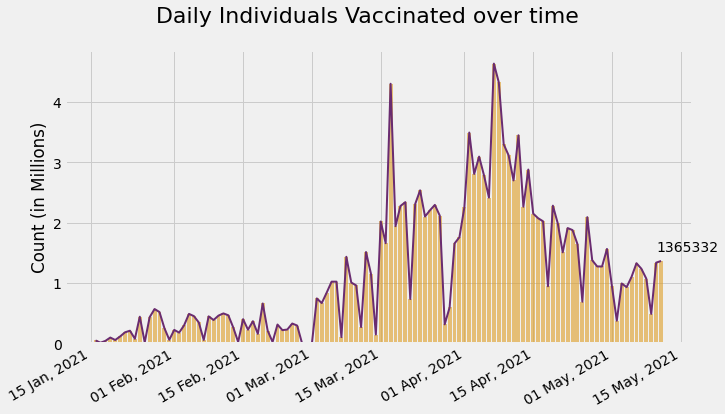

In [67]:
plt.figure(figsize=(10,6))
plt.bar(daily_vac.index, daily_vac.values/10**6,color='#de9d23', alpha=.6)
plt.plot(daily_vac/10**6, color='#6a2c70', linewidth=2)


plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)

# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(len(daily_vac)/15))

plt.ylabel('Count (in Millions)')
plt.suptitle('Daily Individuals Vaccinated over time', fontsize=22)

plt.annotate(text=str(todays_vac), xy=(curr_date, todays_vac/10**6),
             xycoords='data', xytext=(-5,10), textcoords='offset points', fontsize=14)